In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from sklearn.datasets import load_wine

In [89]:
wine = load_wine().data

In [90]:
wine_list = pd.DataFrame(wine, columns=load_wine().feature_names)

In [91]:
wine_list["target"] = load_wine().target

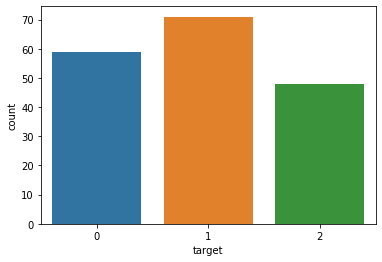

In [92]:
sns.countplot(x="target", data=wine_list)

In [93]:
### Training testing and splitting

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
X = wine_list.drop("target", axis=1).values
y = to_categorical(wine_list["target"].values)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=100)

#### Scaling the data 

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scalar = MinMaxScaler()

In [100]:
X_train = scalar.fit_transform(X_train)

In [101]:
X_test = scalar.transform(X_test)

In [102]:
X_train.shape

(117, 13)

In [103]:
y_train.shape

(117, 3)

### Model creation

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dropout,Dense

In [105]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=20)

In [106]:
dir_path = "logs/fit"

board = TensorBoard(  log_dir=dir_path,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,)

In [107]:
model = Sequential()
model.add(Dense(units=20, activation = "relu"))
model.add(Dense(units=10, activation = "relu"))
model.add(Dense(units=10, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [108]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, callbacks=[stop,board])

Train on 117 samples, validate on 61 samples
Epoch 1/200
117/117 [==============================] - 1s 11ms/sample - loss: 1.0752 - accuracy: 0.3675 - val_loss: 1.0908 - val_accuracy: 0.2459
Epoch 2/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0685 - accuracy: 0.4701 - val_loss: 1.0900 - val_accuracy: 0.2951
Epoch 3/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0636 - accuracy: 0.4701 - val_loss: 1.0891 - val_accuracy: 0.2951
Epoch 4/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0566 - accuracy: 0.4701 - val_loss: 1.0866 - val_accuracy: 0.3115
Epoch 5/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0500 - accuracy: 0.5043 - val_loss: 1.0835 - val_accuracy: 0.3443
Epoch 6/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0430 - accuracy: 0.5470 - val_loss: 1.0803 - val_accuracy: 0.3770
Epoch 7/200
117/117 [==============================] - 0s 1ms/sample - loss: 1.0370 

Epoch 57/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.2270 - accuracy: 0.9402 - val_loss: 0.2203 - val_accuracy: 0.9508
Epoch 58/200
117/117 [==============================] - 0s 998us/sample - loss: 0.2207 - accuracy: 0.9402 - val_loss: 0.2112 - val_accuracy: 0.9672
Epoch 59/200
117/117 [==============================] - 0s 935us/sample - loss: 0.2133 - accuracy: 0.9402 - val_loss: 0.2137 - val_accuracy: 0.9508
Epoch 60/200
117/117 [==============================] - 0s 921us/sample - loss: 0.2059 - accuracy: 0.9402 - val_loss: 0.2059 - val_accuracy: 0.9508
Epoch 61/200
117/117 [==============================] - 0s 2ms/sample - loss: 0.1986 - accuracy: 0.9487 - val_loss: 0.1950 - val_accuracy: 0.9672
Epoch 62/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.1925 - accuracy: 0.9487 - val_loss: 0.1888 - val_accuracy: 0.9672
Epoch 63/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.1864 - accuracy: 0.9487 - val_loss: 0.

Epoch 113/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0404 - accuracy: 0.9915 - val_loss: 0.0872 - val_accuracy: 0.9672
Epoch 114/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0398 - accuracy: 0.9915 - val_loss: 0.0840 - val_accuracy: 0.9672
Epoch 115/200
117/117 [==============================] - 0s 995us/sample - loss: 0.0385 - accuracy: 0.9915 - val_loss: 0.0864 - val_accuracy: 0.9672
Epoch 116/200
117/117 [==============================] - 0s 992us/sample - loss: 0.0377 - accuracy: 0.9915 - val_loss: 0.0880 - val_accuracy: 0.9672
Epoch 117/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0897 - val_accuracy: 0.9672
Epoch 118/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9672
Epoch 119/200
117/117 [==============================] - 0s 994us/sample - loss: 0.0349 - accuracy: 1.0000 - val_l

117/117 [==============================] - 0s 2ms/sample - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9672
Epoch 169/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9672
Epoch 170/200
117/117 [==============================] - 0s 928us/sample - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9672
Epoch 171/200
117/117 [==============================] - 0s 2ms/sample - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9672
Epoch 172/200
117/117 [==============================] - 0s 1ms/sample - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9672
Epoch 173/200
117/117 [==============================] - 0s 892us/sample - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9672
Epoch 174/200
117/117 [==============================] - 0s 1000us/sample - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0709 -

In [109]:
metrics = pd.DataFrame(model.history.history)

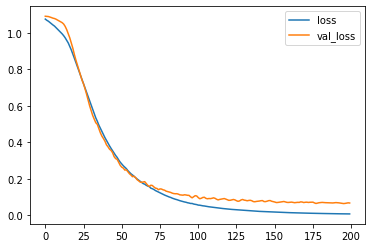

In [110]:
metrics[["loss", "val_loss"]].plot()

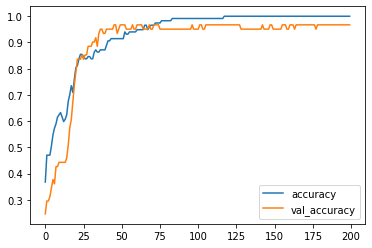

In [111]:
metrics[["accuracy", "val_accuracy"]].plot()

In [112]:
predicitons = model.predict_classes(X_test)

In [113]:
y_test_converted = np.argmax(y_test, axis = 1)

In [114]:
len(y_test_converted)

61

In [115]:
len(predicitons)

61

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [117]:
print(classification_report(y_test_converted, predicitons))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        22
           2       1.00      0.91      0.95        23

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [118]:
print(confusion_matrix(y_test_converted, predicitons))

[[16  0  0]
 [ 0 22  0]
 [ 0  2 21]]


In [119]:
print(explained_variance_score(y_test_converted,predicitons))

0.9493562231759657


### Testing on random Data

In [120]:
from random import randint
random_index = randint(1,len(wine_list))
rand_wine_selection = wine_list.drop("target", axis=1).iloc[random_index]

In [121]:
X_train.shape

(117, 13)

In [122]:
new_wine = scalar.transform(rand_wine_selection.values.reshape(1,13))

In [123]:
model.predict_classes(new_wine)

array([1])

In [124]:
wine_list.iloc[random_index]["target"]

1.0

In [125]:
pwd

'/Users/berkatbhatti/Desktop/Python/Portfolio/Artificial Neural Networks/WineClassification'